In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Deep learning model used 
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from PIL import Image 
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [3]:
data_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'
filePaths = []
labels = []


folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filePaths.append(fpath)
        labels.append(fold)

In [4]:
Fseries = pd.Series(filePaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
df

,filepaths,labels
0,/kaggle/input/brain-mri-images-for-brain-tumor...,no
1,/kaggle/input/brain-mri-images-for-brain-tumor...,no
2,/kaggle/input/brain-mri-images-for-brain-tumor...,no
3,/kaggle/input/brain-mri-images-for-brain-tumor...,no
4,/kaggle/input/brain-mri-images-for-brain-tumor...,no
...,...,...
250,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
251,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
252,/kaggle/input/brain-mri-images-for-brain-tumor...,yes
253,/kaggle/input/brain-mri-images-for-brain-tumor...,brain_tumor_dataset


In [6]:
# spliting dataset into testset and trainingset
strat = df['labels']
train_df, test_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

In [7]:
batch_size = 8
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 202 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.


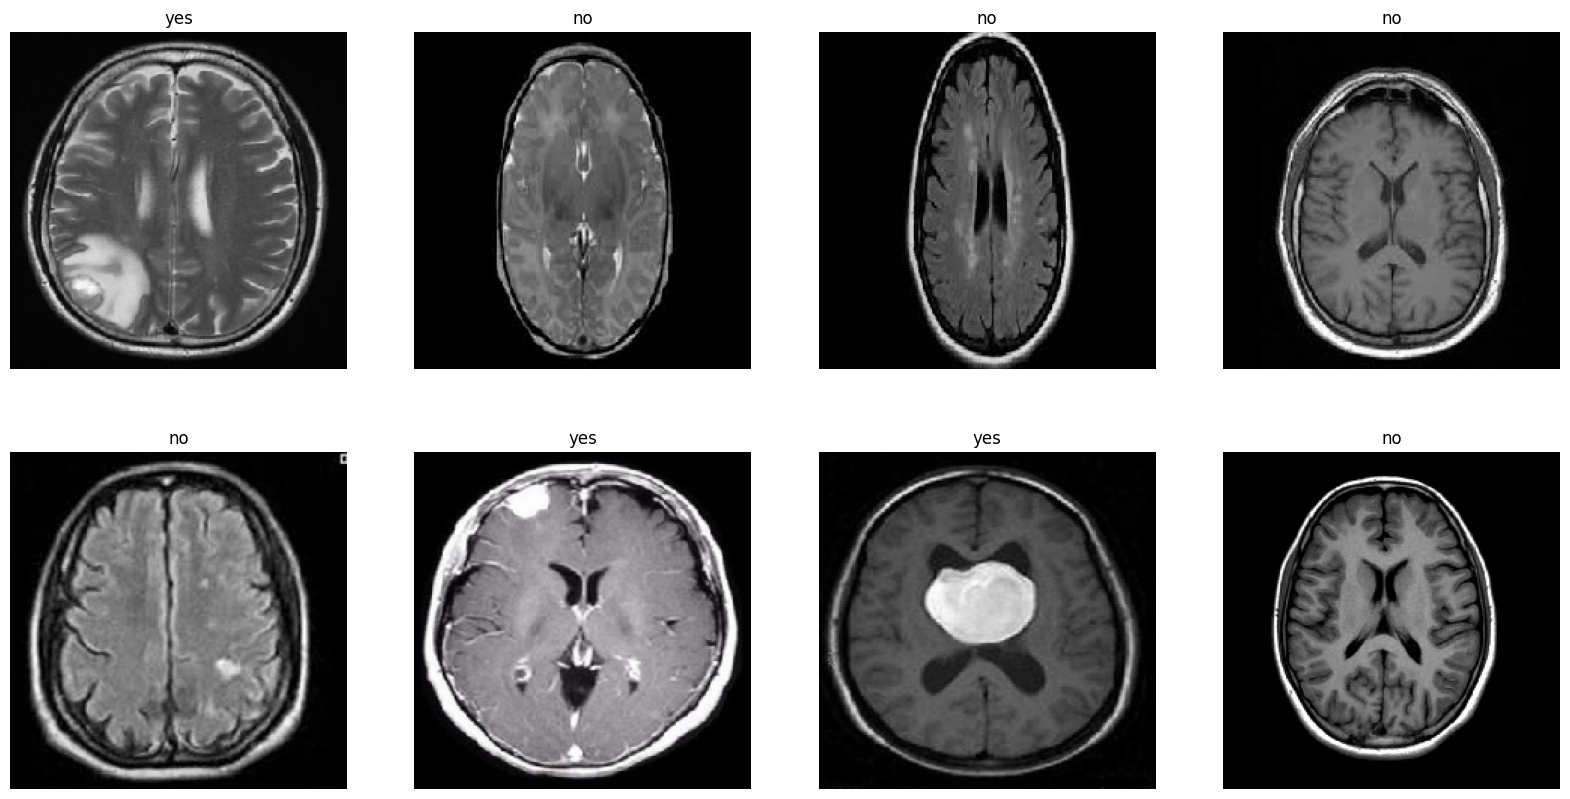

In [8]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 10))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [9]:
class_count = len(list(train_gen.class_indices.keys()))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(class_count, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer = 'adam',
             loss= tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])

model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7d619508e200>>

In [11]:
history = model.fit(train_gen, epochs = 30 )

Epoch 1/30
26/26 [==============================] - 19s 672ms/step - loss: 526.5994 - accuracy: 0.6386
Epoch 2/30
26/26 [==============================] - 17s 663ms/step - loss: 0.9905 - accuracy: 0.8267
Epoch 3/30
26/26 [==============================] - 17s 645ms/step - loss: 0.2094 - accuracy: 0.9356
Epoch 4/30
26/26 [==============================] - 17s 667ms/step - loss: 0.0591 - accuracy: 0.9901
Epoch 5/30
26/26 [==============================] - 17s 661ms/step - loss: 0.0278 - accuracy: 0.9901
Epoch 6/30
26/26 [==============================] - 17s 637ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 7/30
26/26 [==============================] - 17s 656ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 8/30
26/26 [==============================] - 17s 643ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/30
26/26 [==============================] - 17s 667ms/step - loss: 6.0235e-04 - accuracy: 1.0000
Epoch 10/30
26/26 [==============================] - 17s 656ms/step - loss: 2.5290e-0

In [12]:
test_score = model.evaluate(test_gen, verbose= 1)
train_score = model.evaluate(train_gen, verbose =1)

26/26 [==============================] - 3s 116ms/step - loss: 7.3464e-06 - accuracy: 1.0000


In [13]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

7/7 [==============================] - 1s 106ms/step


In [14]:
preds

array([[2.7625421e-15, 9.9999994e-01],
       [1.5595913e-07, 9.9999982e-01],
       [1.1204216e-14, 9.9999994e-01],
       [2.6349927e-21, 9.9999994e-01],
       [5.7531754e-03, 9.9424690e-01],
       [4.4394627e-12, 9.9999994e-01],
       [1.0232012e-18, 9.9999994e-01],
       [9.9999994e-01, 6.4340648e-15],
       [1.3353734e-08, 9.9999994e-01],
       [1.4599870e-01, 8.5400134e-01],
       [1.1826471e-37, 9.9999994e-01],
       [1.5906663e-08, 9.9999994e-01],
       [9.9999994e-01, 2.4378866e-09],
       [2.5029894e-04, 9.9974978e-01],
       [9.9999422e-01, 5.6989875e-06],
       [2.6887672e-14, 9.9999994e-01],
       [3.0312990e-06, 9.9999696e-01],
       [1.9815314e-08, 9.9999994e-01],
       [9.9999994e-01, 4.8045062e-28],
       [9.9986792e-01, 1.3216115e-04],
       [5.9797933e-10, 9.9999994e-01],
       [9.9998778e-01, 1.2104739e-05],
       [4.9893481e-34, 9.9999994e-01],
       [9.9999994e-01, 3.9488923e-09],
       [7.2250157e-17, 9.9999994e-01],
       [7.5004481e-02, 9.

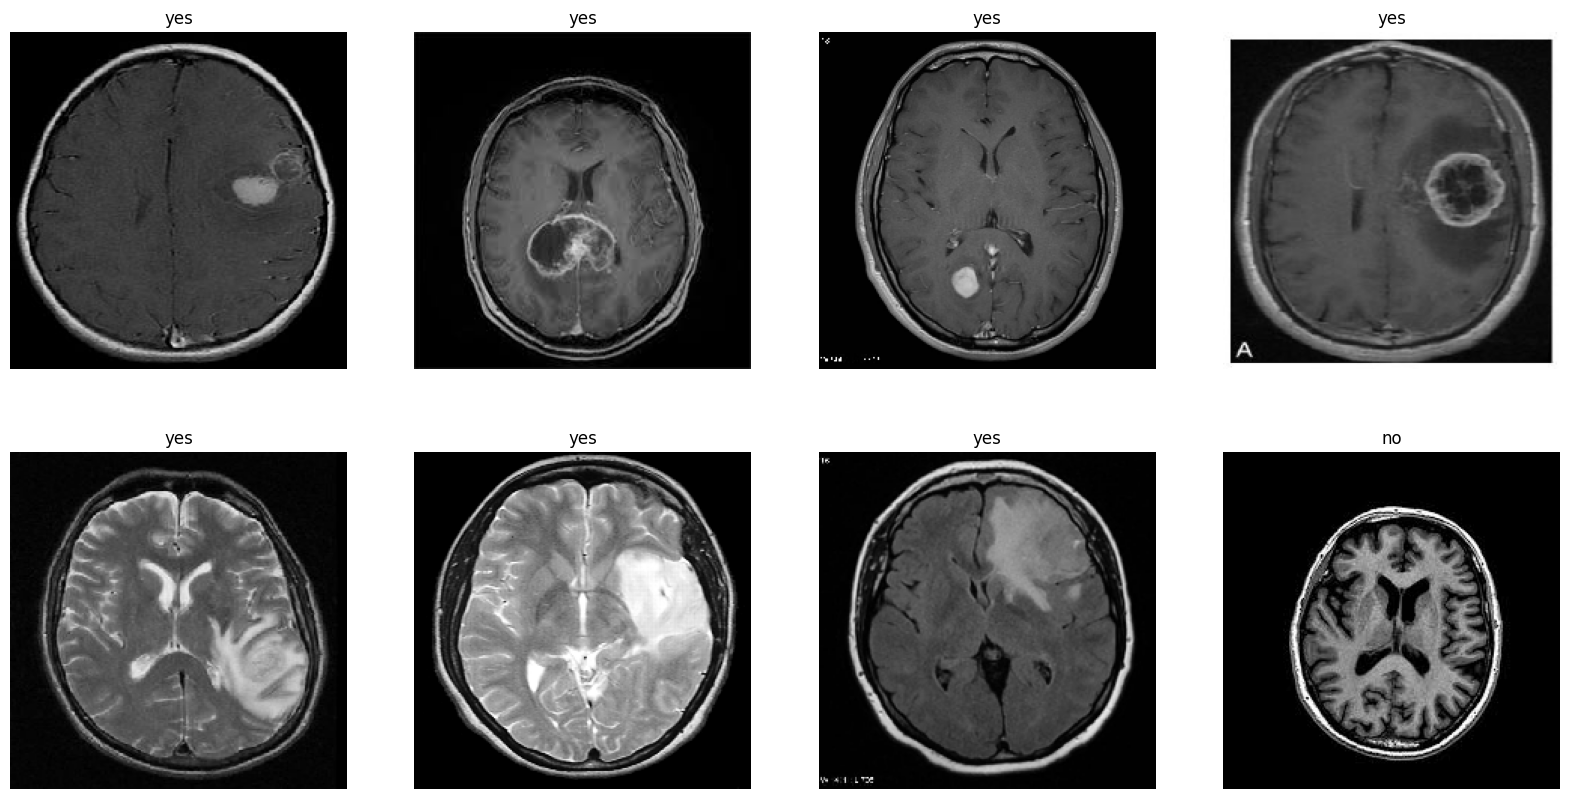

In [15]:
g_dict = test_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(test_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 10))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()